# ANALISA DATA MENGGUNAKAN KNN DAN DECISION TREE (UTS)

# KNN

In [ ]:
import pandas as pd
dataset_url = "https://raw.githubusercontent.com/CAHYANIR/data/main/dataR2.csv"
df = pd.read_csv(dataset_url)
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
df.shape

(116, 10)

In [ ]:
X = df.drop(columns=['Classification'])
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
y = df['Classification'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.predict(X_test)[0:29]

array([1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2])

In [ ]:
knn.score(X_test, y_test)

0.3333333333333333

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.5        0.52173913 0.47826087 0.47826087 0.60869565]
cv_scores mean:0.5173913043478261


In [ ]:
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 23}

In [ ]:
knn_gscv.best_score_

0.5688405797101449

#DECISION TREE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier      
from sklearn.model_selection import train_test_split 
from sklearn import metrics                         
from sklearn.metrics import classification_report 
from sklearn import preprocessing
from sklearn import utils

In [ ]:
df = pd.read_csv("dataR2.csv")
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [ ]:
df.corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


In [ ]:
X = df.iloc[:,0:9].values 
Y = df.iloc[:, 9].values  
print(X.shape, '\n')
print(Y.shape)

(116, 9) 

(116,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
lab = preprocessing.LabelEncoder()
y_transformed = lab. fit_transform(y)

In [ ]:
# Model dengan hyperparameter default
model_default = DecisionTreeClassifier()
model_default = model_default.fit(X_train, Y_train)

# Model dengan tuning hyperparameter
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=5,  random_state=25)
model_DT = model_DT.fit(X_train, Y_train)

In [ ]:
# hasil prediksi training set
y_pred_train = model_DT.predict(X_train)

# hasil prediksi test set
y_pred = model_DT.predict(X_test)

# Train set score
print("Train Accuracy   :", metrics.accuracy_score(Y_train, y_pred_train))
print("Train Precission :", metrics.precision_score(Y_train, y_pred_train))
print("Train Recall     :", metrics.recall_score(Y_train, y_pred_train), '\n')

# Test set score
print("Test Accuracy   :", metrics.accuracy_score(Y_test, y_pred))
print("Test Precission :", metrics.precision_score(Y_test, y_pred))
print("Test Recall     :", metrics.recall_score(Y_test, y_pred))

Train Accuracy   : 0.7608695652173914
Train Precission : 0.7142857142857143
Train Recall     : 0.75 

Test Accuracy   : 0.7916666666666666
Test Precission : 0.7692307692307693
Test Recall     : 0.8333333333333334


In [ ]:
# hasil prediksi training set
y_pred_train = model_DT.predict(X_train)

# hasil prediksi test set
y_pred = model_DT.predict(X_test)

# Train set score
print("Train Accuracy   :", metrics.accuracy_score(Y_train, y_pred_train))
print("Train Precission :", metrics.precision_score(Y_train, y_pred_train))
print("Train Recall     :", metrics.recall_score(Y_train, y_pred_train), '\n')

# Test set score
print("Test Accuracy   :", metrics.accuracy_score(Y_test, y_pred))
print("Test Precission :", metrics.precision_score(Y_test, y_pred))
print("Test Recall     :", metrics.recall_score(Y_test, y_pred))

Train Accuracy   : 0.7608695652173914
Train Precission : 0.7142857142857143
Train Recall     : 0.75 

Test Accuracy   : 0.7916666666666666
Test Precission : 0.7692307692307693
Test Recall     : 0.8333333333333334


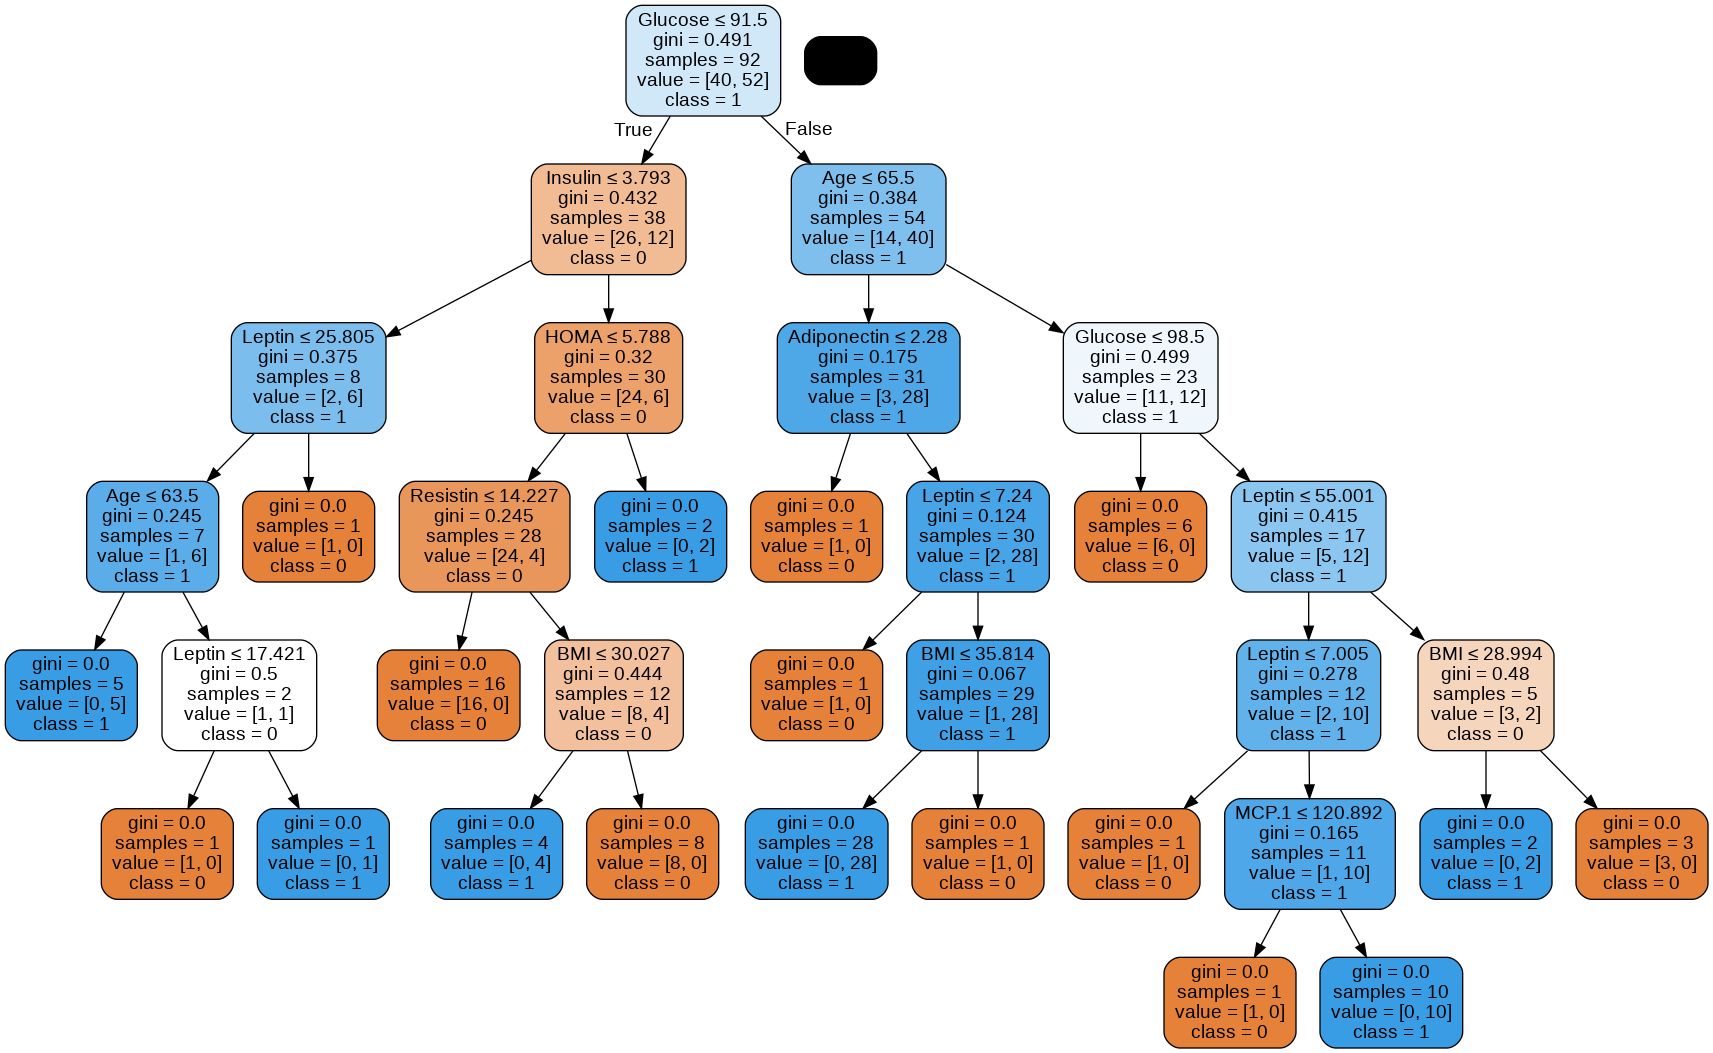

In [176]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']
dot_data = StringIO()

export_graphviz(model_default,
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_model_default.png')
Image(graph.create_png())

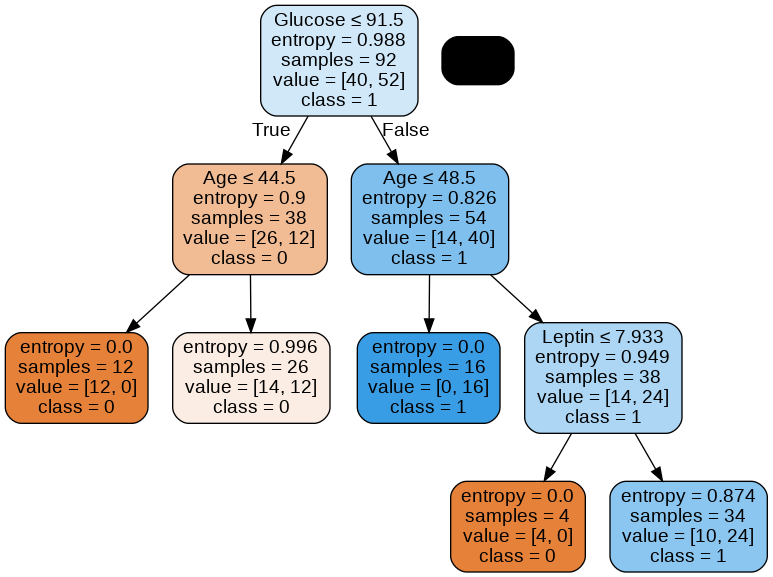

In [175]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']
dot_data = StringIO()

export_graphviz(model_DT,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_model_DT.png')
Image(graph.create_png())

In [177]:
# Prediksi data baru menggunakan model dengan tuning hyperparameter

# Input data baru
Age=float(input("Umur : "))
BMI=float(input("BMI : "))
Glucose=float(input("Glucoce : "))
Insulin=float(input("Insulin : "))
HOMA=float(input("Homa : "))
Leptin=float(input("Leptin : "))
Adiponectin=float(input("Adiponectin : "))
Resistin=float(input("Resistin : "))
MCP5=float(input("MCP.1 : "))
data_baru = [[Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP]]

# Memprediksi data baru
hasil_prediksi = model_DT.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)

# Cetak hasil prediksi
if hasil_prediksi >= 100:
  print('\nTidak berpotensi menderita diabetes!')
else:
  print('\nBerpotensi menderita diabetes!')

Umur : 23
BMI : 31
Glucoce : 31
Insulin : 24
Homa : 31
Leptin : 24
Adiponectin : 245
Resistin : 131
MCP.1 : 414
[[23.0, 31.0, 31.0, 24.0, 31.0, 24.0, 245.0, 131.0, 414.0]]

Berpotensi menderita diabetes!
